In [21]:
import xarray as xr
import matplotlib.pyplot as plt

### Fluxes

In [36]:
pp = '/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/'
ppname = 'ocean_bling_ocn_flux'
localdir = '/ts/monthly/10yr/'
experiments = ['','_gat','_zero','_double']
var = 'co2_flux_flux_ice_ocn'
timespan = '*'
dd = {}
for e in experiments:
    filename = ppname+e+'.'+timespan+'.'+var+'.nc'
    path = pp+ppname+e+localdir+filename
    print(path)
    dd[e] = xr.open_mfdataset(path)
    
gridpath = pp+'static.nc'
grid = xr.open_dataset(gridpath)


/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_ocn_flux/ts/monthly/10yr/ocean_bling_ocn_flux.*.co2_flux_flux_ice_ocn.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_ocn_flux_gat/ts/monthly/10yr/ocean_bling_ocn_flux_gat.*.co2_flux_flux_ice_ocn.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_ocn_flux_zero/ts/monthly/10yr/ocean_bling_ocn_flux_zero.*.co2_flux_flux_ice_ocn.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_ocn_flux_double/ts/monthly/10yr/ocean_bling_ocn_flux_double.*.co2_flux_flux_ice_ocn.nc


In [37]:
dd['zero'] = dd['_zero']-dd['_gat']
dd['double'] = dd['_double']-dd['_gat']
dd['noneq'] = dd['']-dd['_gat']

In [38]:
perturbations = ['zero','double','noneq']

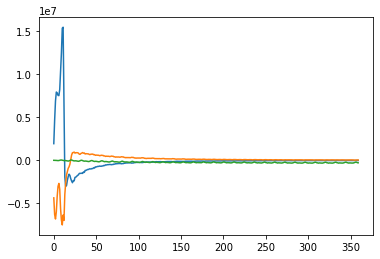

In [39]:
for p in perturbations:
    tmp = (dd[p][var]*grid['area_t']).sum(['xt_ocean','yt_ocean'])
    plt.plot(tmp)

### Tracers

In [89]:
pp = '/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/'
ppname_pre = 'ocean_bling'
ppname_suf = '_tracers'
localdir = '/ts/monthly/10yr/'
experiments = ['','_gat','_zero','_double']
var = 'po4'
timespan = '*'
dd = {}
for e in experiments:
    ppname = ppname_pre+e+ppname_suf
    filename = ppname+'.'+timespan+'.'+var+'.nc'
    path = pp+ppname+localdir+filename
    print(path)
    dd[e] = xr.open_mfdataset(path)

# Grid
gridpath = pp+'static.nc'
grid = xr.open_dataset(gridpath)
# Difference
dd['zero'] = dd['_zero']-dd['_gat']
dd['double'] = dd['_double']-dd['_gat']
dd['noneq'] = dd['']-dd['_gat']
perturbations = ['zero','double','noneq']

/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_tracers/ts/monthly/10yr/ocean_bling_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_gat_tracers/ts/monthly/10yr/ocean_bling_gat_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_zero_tracers/ts/monthly/10yr/ocean_bling_zero_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_double_tracers/ts/monthly/10yr/ocean_bling_double_tracers.*.po4.nc


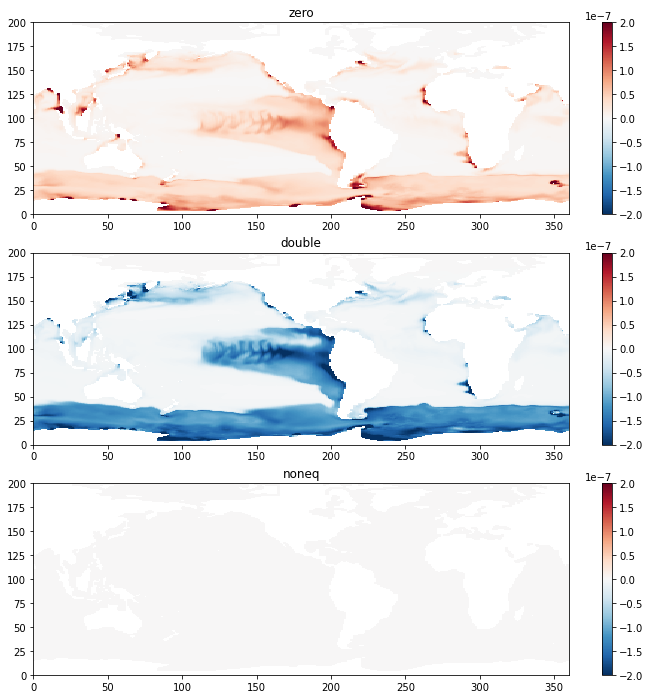

In [90]:
iselect = {'time':0*12,'st_ocean':0}
kwargs = {'vmin':-2E-7,'vmax':2E-7,'cmap':'RdBu_r'}
fig,axarr=plt.subplots(figsize=(12,12),nrows=3)
for i,p in enumerate(perturbations):
    ax = axarr.flat[i]
    tmp = dd[p][var].isel(iselect)
    im = ax.pcolormesh(tmp,**kwargs)
    ax.set_title(p)
    plt.colorbar(im,ax=ax)

In [79]:
dd['']

<xarray.Dataset>
Dimensions:         (nv: 2, scalar_axis: 1, st_edges_ocean: 51, st_ocean: 50, time: 360, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean        (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean        (yt_ocean) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * st_ocean        (st_ocean) float64 5.0 15.0 25.0 ... 4.95e+03 5.316e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.0 20.0 ... 5.133e+03 5.5e+03
  * time            (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:00:00
  * nv              (nv) float64 1.0 2.0
  * scalar_axis     (scalar_axis) float64 0.0
Data variables:
    delta_pco2      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(120, 200, 360), meta=np.ndarray>
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(120, 2), meta=np.ndarray>
Attributes:
    filename:   00010101.ocean_bling_tracers.nc
    title:      MOM5_SIS_BLING_CORE2-gat-initial
    grid_type:  mosaic
    grid_tile:  1
    history:    2020-03-18 11:56:08 -0400: PostProcessing::PPNetCDF::time_mea...